In [2]:
import ROOT
import numpy as np
import pandas as pd
import my_library.gluex_style as gs

Welcome to JupyROOT 6.24/04


In [51]:
colors = {
    8: ROOT.kRed,
    9: ROOT.kBlue,
    10: ROOT.kMagenta,
    11: ROOT.kGreen,
}

In [52]:
binned_fit_results_filename = f'/work/halld/home/viducic/data/fit_params/pipkmks/cross_section_values.csv'

df = pd.read_csv(binned_fit_results_filename)
df = df[df.beam_energy > 7]

In [53]:
print(df.columns)

Index(['mean', 'mean_error', 'width', 'width_error', 'chi2ndf', 'ks_test',
       'yield', 'yield_error', 'acceptance', 'acceptance_error',
       'cross_section', 'cross_section_error', 't_bin_middle', 't_bin_width',
       'beam_energy'],
      dtype='object')


In [54]:
grouped = df.groupby('beam_energy')

In [55]:
graphs = []
for beam_energy, group in grouped:
    print(beam_energy)
    graph = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cross_section_error.to_numpy())
    graph.SetName(f'graph_{beam_energy}')
    graph.SetMarkerColor(colors[beam_energy])
    graph.SetMarkerStyle(20)
    graph.SetMarkerSize(1.5)
    graphs.append(graph)

8
9
10
11


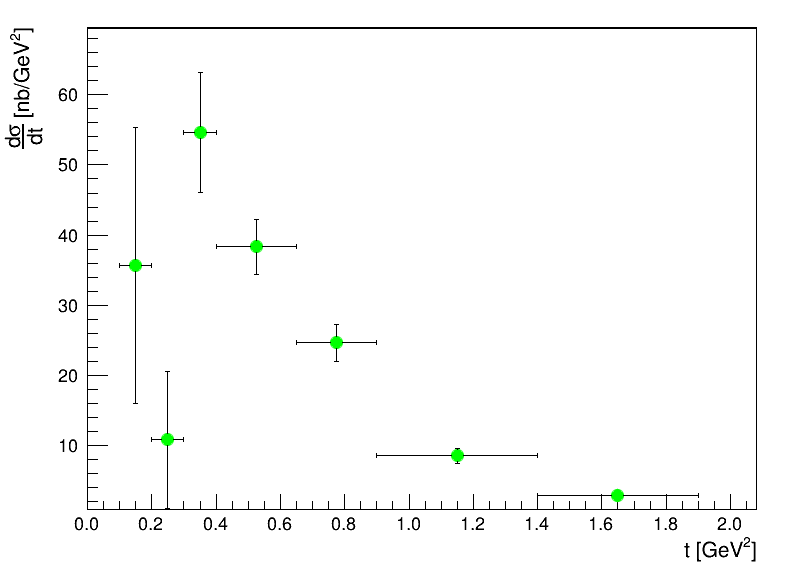

In [57]:
c = ROOT.TCanvas()
for graph in graphs:
    graph.Draw('AP')
    graph.GetXaxis().SetTitle('t [GeV^{2}]')
    graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    c.Draw()
    # c.SaveAs(f'/work/halld/home/viducic/plots/pipkmks/cross_section_values/{graph.GetName()}.pdf')